# Tutorial 6

## Decision Trees

Decision trees are a nonparametric supervised learning method used for both classification and regression. The goal is to create a model predicting the target value (class for clasification; value for regression) with simple decision rules inferred from some features. We represent decision trees with:
- **nodes**, i.e. conditions based on data features;
- **edges**, i.e. splits depending on the conditions; and
- **leaf**, i.e. the output when there are no more nodes left.
The depth of a tree corresponds to the number of nodes in the longest path from a root to a leaf.

Training a decision tree involves forming regions in the feature space by recursively dividing it, more precisely, this procedure performs recursive binary partitioning. Beginning with the whole feature space, the algorithm selects the variable to split upon and the location of the split that minimize some loss function. Then, the resulting two regions are each split
into two more regions until some stopping rule is applied. Finally, the classifier labels each region with a class or a value, depending on the aplication.

During the training phase, we want to reduce the complexity of the tree to avoid overfitting. One often decides to set a minimum number of training inputs to use on each leaf, or fix the maximum depth of the tree. One can also perform *pruning*, which removes the branches making use of features having low importance.

#### Example: Classification with decision tree

In this example, we perform classification on any dataset from the scikit-learn library.

In [1]:
import numpy as np

import matplotlib.pyplot as plt 

import torch # PyTorch library
import torch.nn as nn # all layers e.g. Recurrent neural network (RNN), etc.
import torch.nn.functional as F # all activation functions
import torch.optim as optim # all optimization procedures, e.g. stochastic gradient descent (SGD), Adam, etc.

from sklearn import datasets # iris dataset
from sklearn import tree # module to construct decision trees

In [2]:
# load the dataset (other examples here: https://scikit-learn.org/stable/datasets/toy_dataset.html)
data = datasets.load_breast_cancer()
features = data.data
labels = data.target
# print(data.DESCR)

The function [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) allows us to construct trees. The dcumentation contains many arguments to modify the complexity of the tree. We represent the tree both with a figure and if-else statements.

In [3]:
model = tree.DecisionTreeClassifier()
model = model.fit(features, labels)

[Ellipsis]

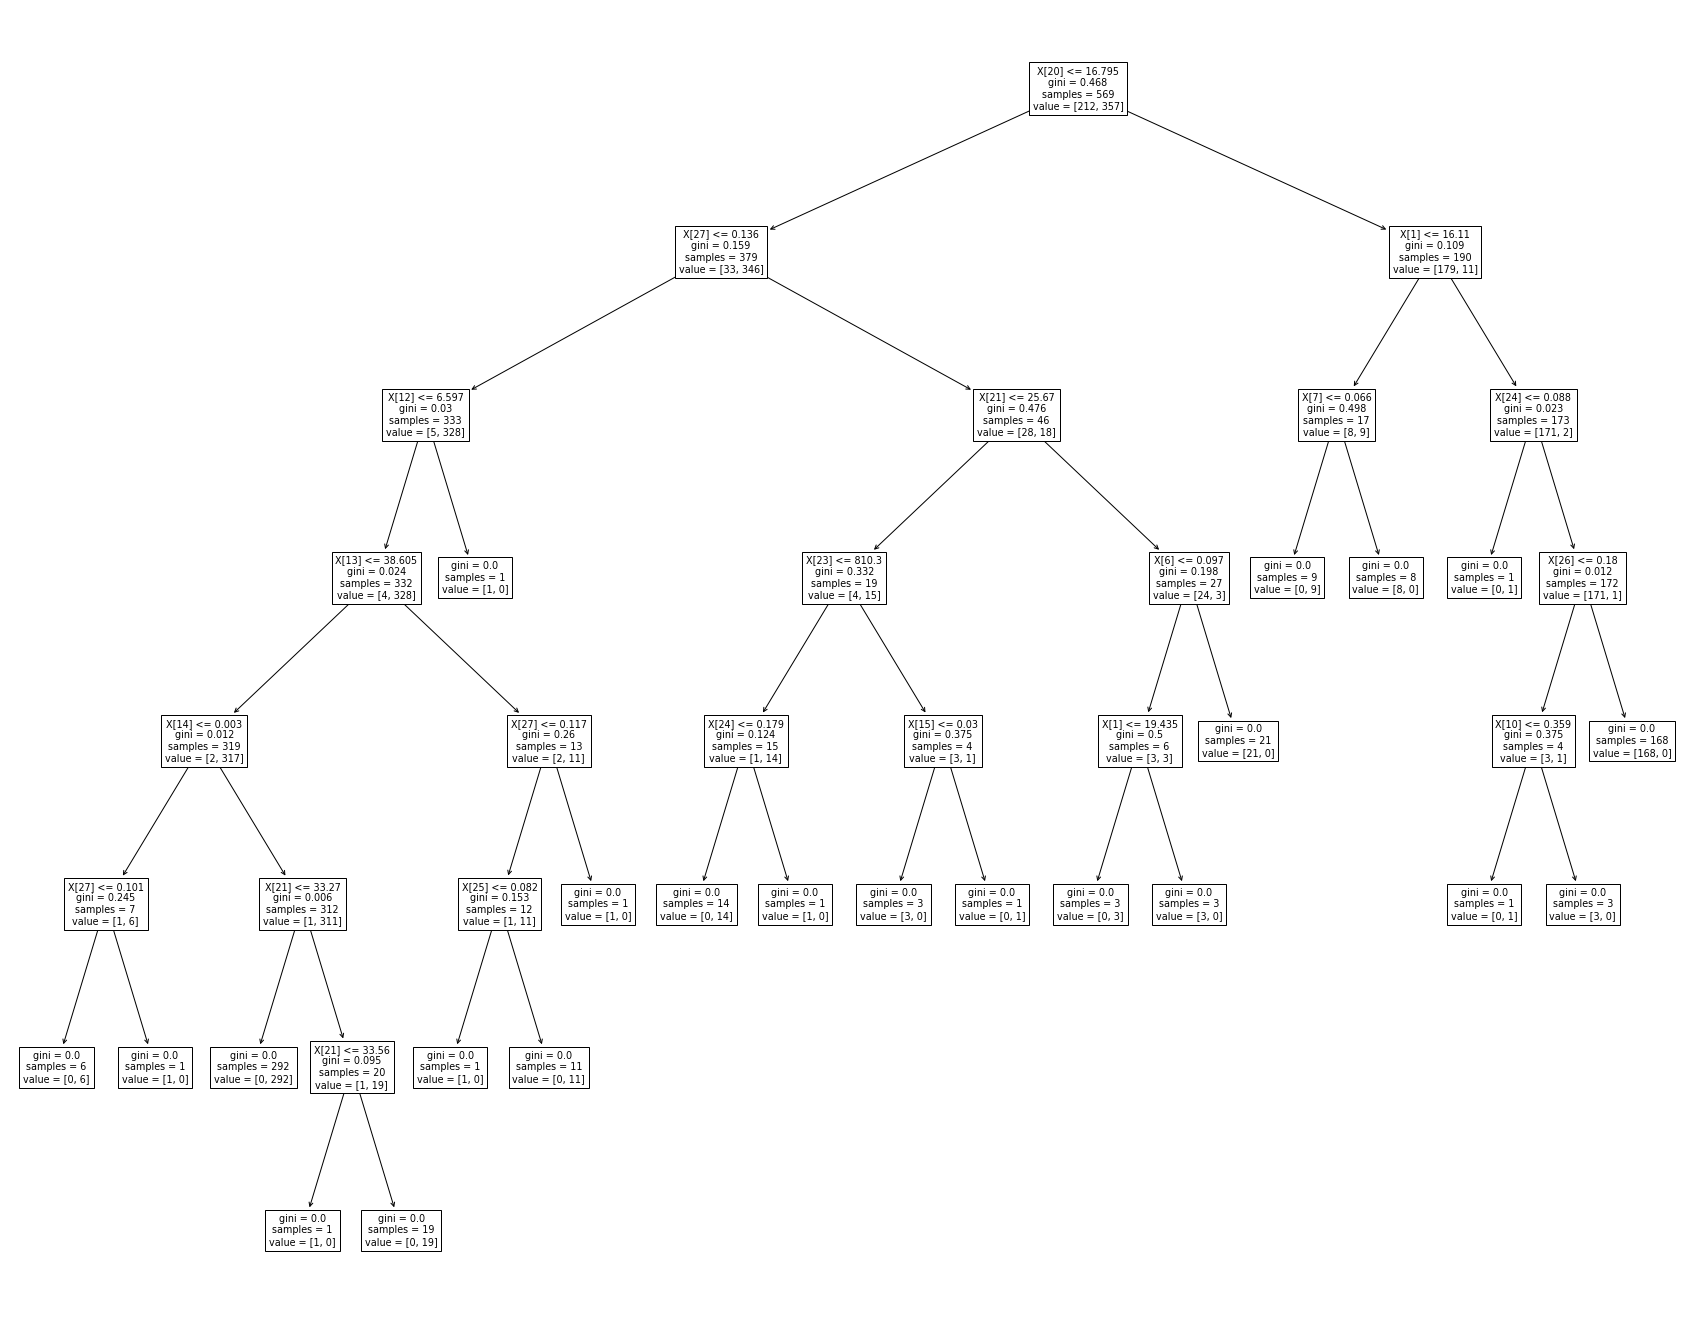

In [4]:
plt.figure(figsize=(30,24))
tree.plot_tree(model)
[...]

In [5]:
print(tree.export_text(model, feature_names=list(data['feature_names'])))

|--- worst radius <= 16.80
|   |--- worst concave points <= 0.14
|   |   |--- perimeter error <= 6.60
|   |   |   |--- area error <= 38.60
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- worst concave points <= 0.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst concave points >  0.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- area error >  38.60
|   |   |   |   |--- worst concave points <= 0.12
|   |   |   |   |   |--- worst compactness <= 0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- worst compactness >  0.08
|   |   |   |   |   |   |--- class: 

#### Example: Regression with decision tree

In this example, we perform a simple regression to see the overfitting issue with decision trees.

In [6]:
xval = np.sort(5 * np.random.rand(80,1))
yval = np.sin(xval) + 0.05*np.random.randn(80,1) # sin with some noise
yval[::8] += 3 * (0.5 - np.random.rand(10,1)) # create outliers

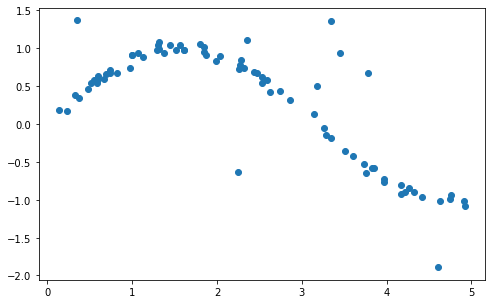

In [7]:
fig, axes = plt.subplots(figsize=(8,5))
axes.scatter(xval, yval)
plt.show()

In [8]:
x_range = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
max_depth = 5
y_preds = np.zeros((500,max_depth-1))

for depth in range(2,max_depth+1):
    # Fit regression model
    regr_tree = tree.DecisionTreeRegressor(max_depth=depth)
    regr_tree.fit(xval, yval)
    y_preds[:,depth-2] = regr_tree.predict(x_range)

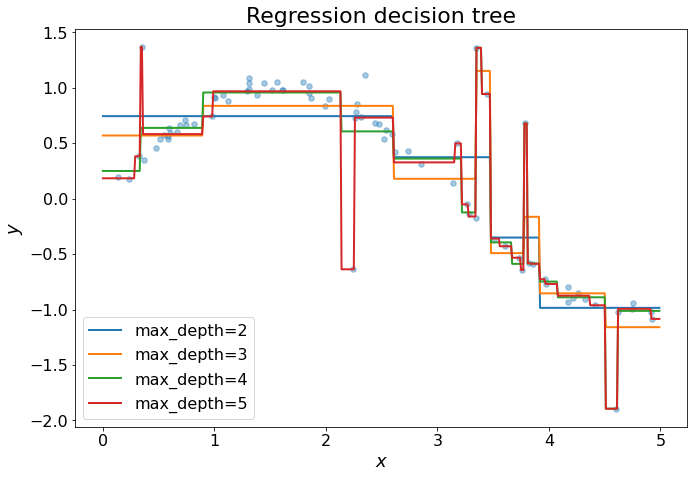

In [9]:
fig, axes = plt.subplots(figsize=(10,7))
axes.scatter(xval, yval, s=30, alpha=0.4)
axes.plot(x_range, y_preds, linewidth=2)
axes.legend(['max_depth=' + str(depth) for depth in range(2,max_depth+1)], fontsize=16)
axes.set_title('Regression decision tree', fontsize=22)
axes.set_xlabel(r'$x$', fontsize=18)
axes.set_ylabel(r'$y$', fontsize=18)
axes.tick_params(axis='both', labelsize=16)
plt.tight_layout(pad=2)
plt.show()